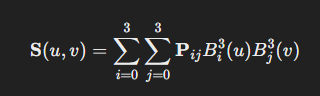

In [5]:
import numpy as np
from scipy.special import comb

# Define Bernstein polynomial
def bernstein(i, t):
    return comb(3, i) * (t**i) * ((1 - t)**(3 - i))

# Compute Bézier surface
def bezier_surface(u, v, control_points):
    S = np.zeros(3)
    for i in range(4):
        for j in range(4):
            B_u = bernstein(i, u)
            B_v = bernstein(j, v)
            S += control_points[i][j] * B_u * B_v
    return S

In [6]:
# 4x4 grid of control points (example)
control_points = np.array([
    [[0, 0, 0], [1, 0, 2], [2, 0, 2], [3, 0, 0]],
    [[0, 1, 1], [1, 1, 3], [2, 1, 3], [3, 1, 1]],
    [[0, 2, 1], [1, 2, 3], [2, 2, 3], [3, 2, 1]],
    [[0, 3, 0], [1, 3, 2], [2, 3, 2], [3, 3, 0]],
])

# Sample the surface
u_vals = np.linspace(0, 1, 20)
v_vals = np.linspace(0, 1, 20)

surface_points = np.array([
    bezier_surface(u, v, control_points)
    for u in u_vals for v in v_vals
]).reshape((20, 20, 3))

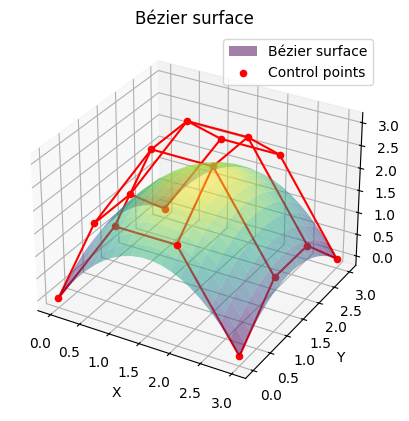

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
X = surface_points[:, :, 0]
Y = surface_points[:, :, 1]
Z = surface_points[:, :, 2]

ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
# plot control points
for i in range(4):
    for j in range(4):
        ax.scatter(control_points[i][j][0], control_points[i][j][1], control_points[i][j][2], color='r')
#draw lines between control points
for i in range(4):
    for j in range(4):
        if i < 3:
            ax.plot([control_points[i][j][0], control_points[i+1][j][0]], [control_points[i][j][1], control_points[i+1][j][1]], [control_points[i][j][2], control_points[i+1][j][2]], color='r')
        if j < 3:
            ax.plot([control_points[i][j][0], control_points[i][j+1][0]], [control_points[i][j][1], control_points[i][j+1][1]], [control_points[i][j][2], control_points[i][j+1][2]], color='r')
plt.title('Bézier surface')
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
plt.legend(['Bézier surface', 'Control points'])
plt.show()
